In [12]:
# Importing required libraries of python.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from geopy.geocoders import Nominatim
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv('/Users/harsha/sales_prediction/data/raw/Data.csv')

In [14]:
# Get top 5 records
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
920067,T5_ENTERPRISE EAST ROLLUP,New,SM507340,440067524,2017-05-15T01:22:12.000Z,36.0,194.00,50.0,500 HOWARD ST,SAN FRANCISCO,CA,UNITED STATES,PL0000108304,722.0,37.788540,-122.396250,0,0,NaN,Financial Services
678298,T5_ENTERPRISE CENTRAL ROLLUP,Existing Customer,SM272817,1478388,2016-02-12T23:02:00.000Z,36.0,340.80,20.0,191 EAST AVE,ROCHESTER,NY,UNITED STATES,PL0000019975,974.0,43.156207,-77.599540,0,0,Tier 2,Media & Entertainment
657859,T5_WHOLESALE SWAT,Existing Customer,SM446101,1818837,2017-01-19T17:23:08.000Z,24.0,359.27,64.0,200 PAUL AVE,SAN FRANCISCO,CA,UNITED STATES,PL0000019143,722.0,37.722955,-122.397733,0,0,Tier 3,Telecommunications
517360,T5_MID-SIZE INSIDE ROLLUP,Existing Customer,SM664131,440446531,2018-01-31T16:31:49.000Z,36.0,490.75,35.0,12001 N CENTRAL EXPY,DALLAS,TX,UNITED STATES,PL0000004941,552.0,32.913613,-96.768442,0,0,Tier 3,Professional Services
745157,T5_ENTERPRISE CENTRAL ROLLUP,New,SM560229,440213541,2017-08-17T20:30:44.000Z,36.0,298.00,0.0,5151 N 9TH AVE,PENSACOLA,FL,UNITED STATES,PL0000107731,44813.0,30.476470,-87.212191,0,0,SEAT,Healthcare


# Overview

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
V1     1000000 non-null object
V2     1000000 non-null object
V3     1000000 non-null object
V4     1000000 non-null object
V5     1000000 non-null object
V6     996593 non-null float64
V7     1000000 non-null float64
V8     1000000 non-null float64
V9     999732 non-null object
V10    1000000 non-null object
V11    999988 non-null object
V12    1000000 non-null object
V13    1000000 non-null object
V14    999159 non-null float64
V15    999890 non-null float64
V16    999890 non-null float64
V17    1000000 non-null int64
V18    1000000 non-null int64
V19    627253 non-null object
V20    835605 non-null object
dtypes: float64(6), int64(2), object(12)
memory usage: 152.6+ MB


In [16]:
print("No of records: ", data.shape[0])
print("No of columns: ", data.shape[1])
print("No of Features: ", data.columns.tolist())
print("\n Missing values: \n", data.isnull().sum())
print("\n No of unique: \n", data.nunique())

No of records:  1000000
No of columns:  20
No of Features:  ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']

 Missing values: 
 V1          0
V2          0
V3          0
V4          0
V5          0
V6       3407
V7          0
V8          0
V9        268
V10         0
V11        12
V12         0
V13         0
V14       841
V15       110
V16       110
V17         0
V18         0
V19    372747
V20    164395
dtype: int64

 No of unique: 
 V1         21
V2          3
V3     216172
V4     544668
V5     215304
V6         72
V7      81678
V8       2093
V9     113394
V10      8140
V11        52
V12         1
V13    115226
V14       213
V15    112763
V16    113377
V17         2
V18         2
V19         7
V20        15
dtype: int64


# Data Cleansing

In [17]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
0,T5_MID-SIZE EAST ROLLUP,New,SM537709,440134601,2017-07-10T15:04:00.000Z,36.0,109999998.9,0.0,2270 E 220TH ST,CARSON,CA,UNITED STATES,PL0000331880,730.0,33.827778,-118.231824,0,1,NaN,Manufacturing
1,T5_MID-SIZE EAST ROLLUP,Existing Customer,SM530898,440115999,2017-06-24T02:31:39.000Z,36.0,109999998.9,0.0,4625 E 1200 S,AMBOY,IN,UNITED STATES,PL0009356784,NaN,40.593367,-85.984135,0,1,NaN,Retail
2,T5_GOV,Existing Customer,SM661091,440440422,2018-01-26T17:01:42.000Z,24.0,107999998.9,0.0,350 LOWELL ST,ANDOVER,MA,UNITED STATES,PL0000472538,128.0,42.643889,-71.189469,0,1,SEAT,Manufacturing
3,T5_ENTERPRISE MOUNTAIN ROLLUP,Existing Customer,SM887881,440990667,2018-11-07T20:45:37.000Z,36.0,40180000.0,0.0,5146 W AMELIA EARHART DR,SALT LAKE CITY,UT,UNITED STATES,PL0000311014,660.0,40.776557,-112.013581,0,0,Tier 2,Financial Services
4,T5_ENTERPRISE MOUNTAIN ROLLUP,Existing Customer,SM887881,440990667,2018-11-07T20:45:37.000Z,36.0,40180000.0,0.0,1850 N PEARL ST,DENVER,CO,UNITED STATES,PL0000005165,656.0,39.745350,-104.979818,0,0,Tier 2,Financial Services


In [18]:
data.V2.replace('New', 'New Customer', inplace=True)
data.V6.fillna(data.V6.median(), inplace=True)
data.V19.fillna('Not assigned', inplace=True)
data.V20.fillna('Not classified', inplace=True)
data['V18'] = data['V18'].map({1:'Auto',0:'Manual'})
data['V14'].fillna(0, inplace=True)

In [19]:
data[data.V15.isnull()].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
6915,T5_SLED,Existing Customer,SM811919,440782713,2018-08-09T13:43:25.000Z,36.0,9596.25,0.0,1050 KY-1008,FRANKLIN,KY,UNITED STATES,PL0013140349,0.0,NaN,NaN,0,Manual,Gov/R&E,Public Sector
12228,T5_SLED,Existing Customer,SM811919,440782676,2018-08-09T13:43:25.000Z,36.0,6545.00,0.0,1050 KY-1008,FRANKLIN,KY,UNITED STATES,PL0013140349,0.0,NaN,NaN,0,Manual,Gov/R&E,Public Sector
17232,T5_SLED,Existing Customer,SM811919,440782672,2018-08-09T13:43:25.000Z,36.0,5329.80,0.0,1050 KY-1008,FRANKLIN,KY,UNITED STATES,PL0013140349,0.0,NaN,NaN,0,Manual,Gov/R&E,Public Sector
42980,T5_WHOLESALE SWAT,New Customer,SM556009,440205469,2017-08-10T17:02:39.000Z,12.0,3240.00,0.0,3830 PARROTT DR,CHARLOTTE,NC,UNITED STATES,PL0009963111,0.0,NaN,NaN,0,Auto,SEAT,Telecommunications
50597,T5_ENTERPRISE MOUNTAIN ROLLUP,Existing Customer,SM725548,440595281,2018-04-20T17:51:45.000Z,36.0,2922.50,0.0,4000 SW MODERN WAY,BENTONVILLE,AR,UNITED STATES,PL0012617710,0.0,NaN,NaN,0,Manual,Not assigned,Not classified


In [20]:
 data.V15[6915]

nan

In [21]:
ind = data[data.V15.isnull()].index.tolist()

for x in ind:
    geolocator = Nominatim(user_agent="century")
    location =  geolocator.geocode(str(data.V9[x]+' '+data.V10[x]+' '+data.V11[x]+' '+data.V12[x]))
    try:
        data.V15[x]= location.latitude
        data.V16[x]= location.longitude
    except:
        data['V15'][x] = 0
        data['V16'][x] = 0

In [22]:
#ind

In [23]:
data.V15[6915]

36.7149466744921

# Summary Statistics

In [24]:
data.describe()

,V6,V7,V8,V14,V15,V16,V17
count,1000000.000000,1.000000e+06,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000
mean,32.932081,1.978175e+03,20.560826,1411.25321,36.686080,-94.303211,0.168134
std,16.481237,2.093425e+05,27.072929,6584.38301,5.310799,17.910010,0.373985
min,0.000000,1.514000e+02,-2296.900000,0.00000,-45.562000,-166.536392,0.000000
25%,24.000000,2.973300e+02,0.000000,354.00000,33.366138,-106.319251,0.000000
50%,36.000000,5.076400e+02,0.000000,538.00000,37.373890,-88.150964,0.000000
75%,36.000000,9.438500e+02,50.000000,674.00000,40.720080,-80.314689,0.000000
max,240.000000,1.100000e+08,100.000000,93902.00000,84.048003,144.814800,1.000000


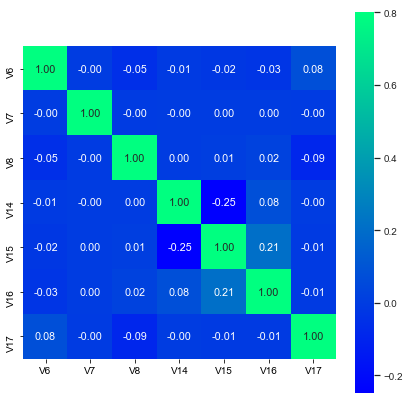

In [25]:
corrmat=data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.set(font_scale=0.9)
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f',cmap="winter")

# Exploratory Data Analysis

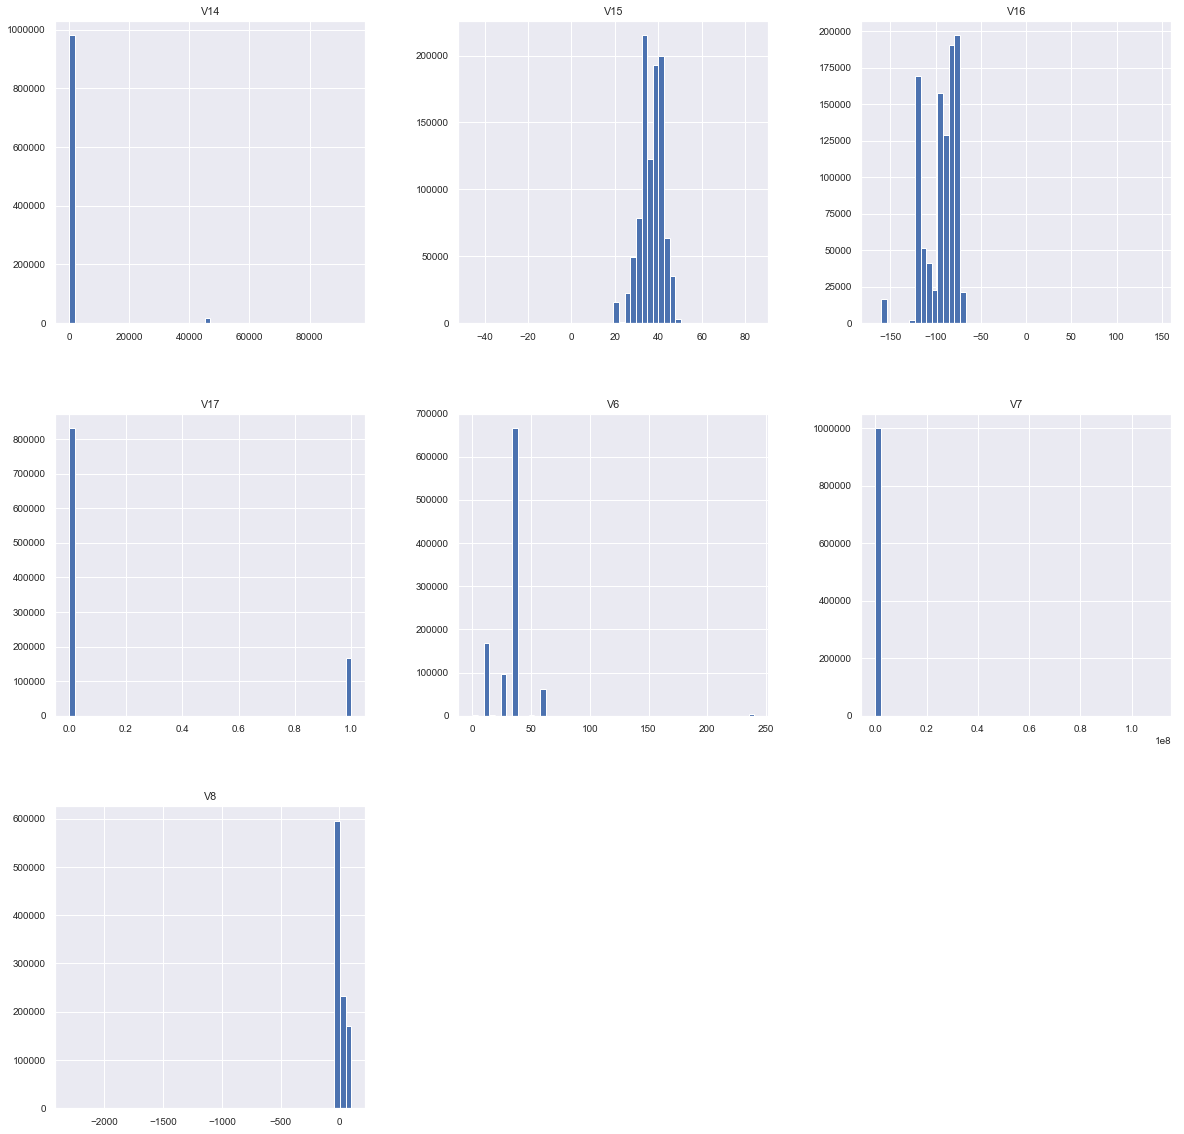

In [26]:
data.hist(bins=50, figsize=(20,20))
plt.show()
#sns.pairplot(data)

In [27]:
#Sales code
print('Total No of unique sales codes: %s'%data.V3.nunique())
#Sales code
print('Total No of unique poduct codes: %s'%data.V4.nunique())
# Contract term
print('Total No of available terms: %s'%data.V6.nunique())
#Monthly rate
print('Total No of Montly rates: %s'%data.V7.nunique())

Total No of unique sales codes: 216172
Total No of unique poduct codes: 544668
Total No of available terms: 72
Total No of Montly rates: 81678


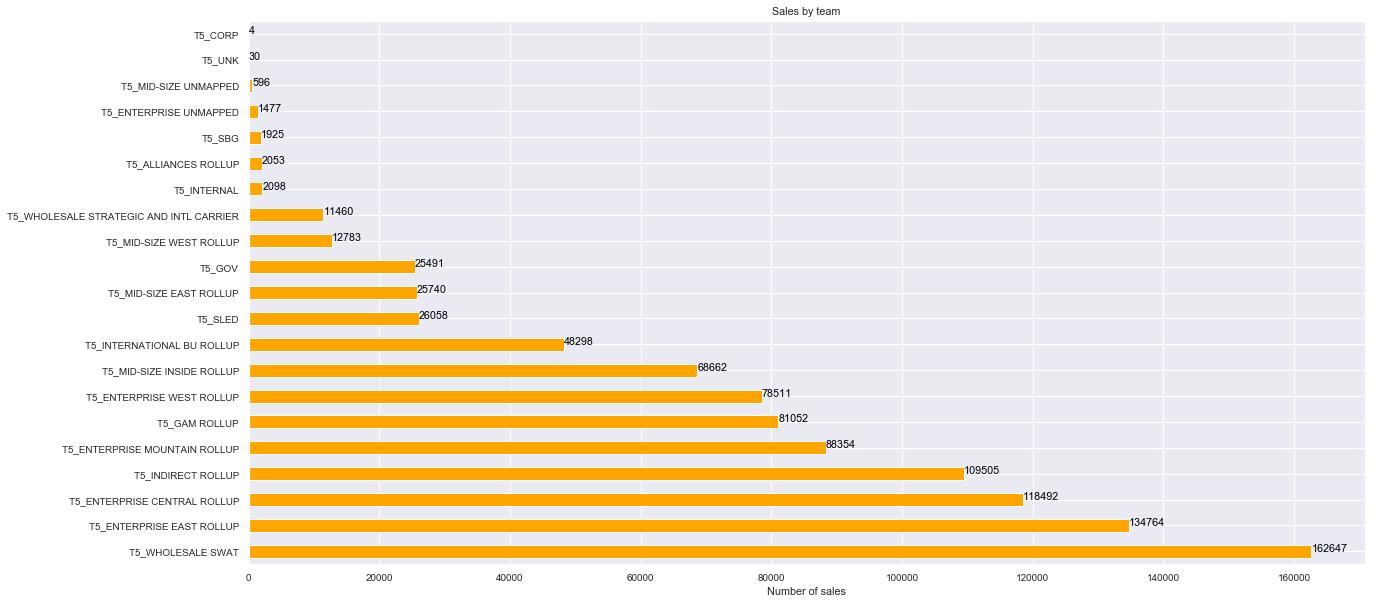

In [28]:
# Sales according to the team level.
sales_team = data.V1.value_counts()
x = sales_team.keys()
y_pos = np.arange(len(x))
y = sales_team.values
ax = sales_team.plot(kind='barh', title='Sales by team',figsize=(20,10), color='orange')
ax.set_xlabel("Number of sales")
for i, v in enumerate(y):
    ax.text(v, i, str(v), color='black')

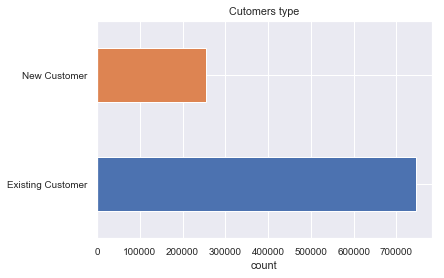

In [29]:
ax_v2=data['V2'].value_counts().plot(kind='barh', title='Cutomers type');
ax_v2.set_xlabel('count');

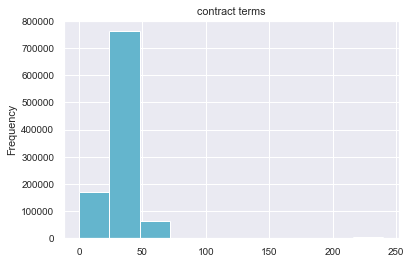

In [30]:
ax_v6 = data.V6.plot(kind='hist', title='contract terms', color='c')

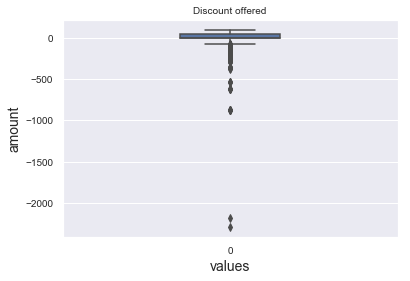

In [31]:
bplot = sns.boxplot(data=data.V8, width = 0.3)
bplot.axes.set_title("Discount offered",
                    fontsize=10)
bplot.set_xlabel("values", 
                fontsize=14)
bplot.set_ylabel("amount",
                fontsize=14)
bplot.tick_params(labelsize=10)

In [32]:
data.V17.value_counts()

0    831866
1    168134
Name: V17, dtype: int64

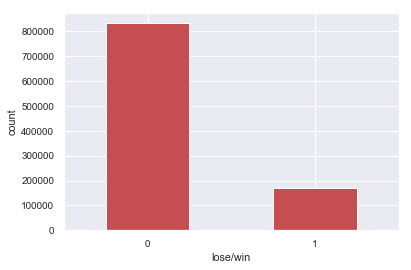

In [33]:
ax_17= data.V17.value_counts().plot(kind='bar', rot=0,color='r');
ax_17.set_xlabel('lose/win');
ax_17.set_ylabel('count');

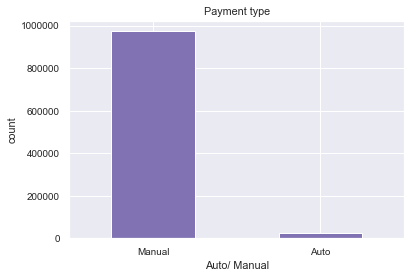

In [34]:
ax_18= data.V18.value_counts().plot(kind='bar', rot=0,title='Payment type',color='m');
ax_18.set_xlabel('Auto/ Manual');
ax_18.set_ylabel('count');

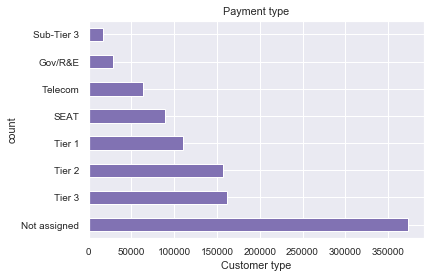

In [35]:
ax_19= data.V19.value_counts().plot(kind='barh', rot=0,title='Payment type',color='m');
ax_19.set_xlabel('Customer type');
ax_19.set_ylabel('count');

In [36]:
data.V19.value_counts()

Not assigned    372747
Tier 3          161643
Tier 2          157575
Tier 1          110049
SEAT             88825
Telecom          63735
Gov/R&E          28682
Sub-Tier 3       16744
Name: V19, dtype: int64

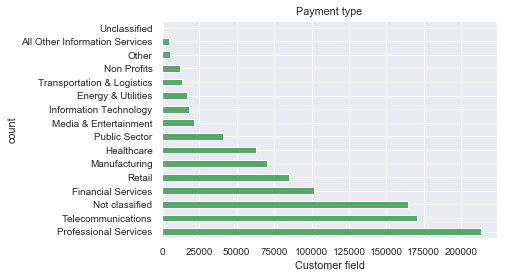

In [37]:
ax_20= data.V20.value_counts().plot(kind='barh', rot=0,title='Payment type',color='g');
ax_20.set_xlabel('Customer field');
ax_20.set_ylabel('count');

In [38]:
print('skewness for contract: {0:.2f}'.format(data.V6.skew()))
print('skewness for price: {0:.2f}'.format(data.V7.skew()))

skewness for contract: 6.12
skewness for price: 447.14


In [39]:
data.drop(['V1','V5','V9','V10','V11','V12','V13'],axis=1, inplace=True)

In [40]:
data.to_csv('processed_data.csv', index=False)